### Hypothesis Testing for correlation coefficient
https://online.stat.psu.edu/stat501/lesson/1/1.9

This script is used to test correlation between two parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from scipy.optimize import curve_fit
import scipy

import re
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('full_parameter_dataframe.csv')

In [3]:
df

,Unnamed: 0,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material,charateristic_length
0,0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
1,1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
2,11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,2000.0
3,12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,180.0
4,13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,17.0
5,14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00,2.5D,1D,Electrolyte channel,N/R,Li4Ti5O12,Lithium,70.0
6,15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
7,16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
8,17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12,15.0
9,18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5


## Simple Pearson Correlation Testing

In [4]:
# Set variables
n = df['n'].values
tau = df['tau'].values
SA2V = df['SA/V [1/µm]'].values
L = df['charateristic_length'].values

In [5]:
# Simple Pearson correlation
pearson_n, p_value_n = scipy.stats.pearsonr(n, SA2V)
pearson_tau, p_value_tau = scipy.stats.pearsonr(tau, SA2V)
pearson_L, p_value_L = scipy.stats.pearsonr(tau, L)

print('Pearson correlation between n and SA/V is',pearson_n)
print('Pearson correlation between tau and SA/V is',pearson_tau)
print('Pearson correlation between tau and L is',pearson_L)

Pearson correlation between n and SA/V is -0.12436016147954101
Pearson correlation between tau and SA/V is -0.3135139771582593
Pearson correlation between tau and L is 0.7872393617066458


## Simple Pearson Correlation Testing without Outlier

In [6]:
# Remove outlier
df_no_outlier = df.drop(index=5)
df_no_outlier

,Unnamed: 0,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material,charateristic_length
0,0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
1,1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
2,11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,2000.0
3,12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,180.0
4,13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,17.0
6,15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
7,16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
8,17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12,15.0
9,18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5
10,19,31,2,12,NaN,0.5,NaN,1.402870,0.094515,313.641256,3.1800,38.20,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5


In [7]:
# Set variables
n_new = df_no_outlier['n'].values
tau_new = df_no_outlier['tau'].values
SA2V_new = df_no_outlier['SA/V [1/µm]'].values
L_new = df_no_outlier['charateristic_length'].values
# Simple Pearson correlation
pearson_n_new, p_value_n_new = scipy.stats.pearsonr(n_new, SA2V_new)
pearson_tau_new, p_value_tau_new = scipy.stats.pearsonr(tau_new, SA2V_new)
pearson_L_new, p_value_L_new = scipy.stats.pearsonr(tau_new, L_new)

print('Pearson correlation between n and SA/V is',pearson_n_new)
print('Pearson correlation between tau and SA/V is',pearson_tau_new)
print('Pearson correlation between tau and L is',pearson_L_new)

Pearson correlation between n and SA/V is -0.2369026930265242
Pearson correlation between tau and SA/V is -0.3870829620172485
Pearson correlation between tau and L is 0.803233113404211


## Spearman Correlation
Unlike Pearson correlation, Spearman correlation does not require the input sample to be normally distributed.

In [8]:
# Spearman correlation
spearman_n_new, p_value_n_new = scipy.stats.spearmanr(n_new, SA2V_new)
spearman_tau_new, p_value_tau_new = scipy.stats.spearmanr(tau_new, SA2V_new)
spearman_L_new, p_value_L_new = scipy.stats.spearmanr(tau_new, L_new)

print('Spearman correlation between n and SA/V is',spearman_n_new)
print('Spearman correlation between tau and SA/V is',spearman_tau_new)
print('Spearman correlation between tau and L is',spearman_L_new)

Spearman correlation between n and SA/V is -0.38415348299103563
Spearman correlation between tau and SA/V is -0.29268836799317
Spearman correlation between tau and L is 0.7706746355884525


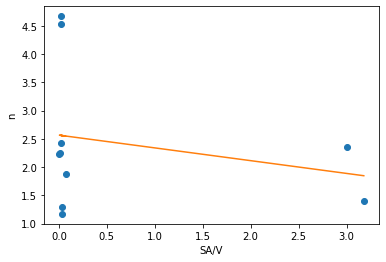

In [14]:
slope, intercept, r, p, stderr = scipy.stats.linregress(SA2V_new, n_new)
n_SA_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(SA2V_new, n_new, linewidth=0, marker='o')
ax.plot(SA2V_new, intercept + slope * SA2V_new, label=n_SA_line)
ax.set_xlabel('SA/V')
ax.set_ylabel('n')
plt.show()

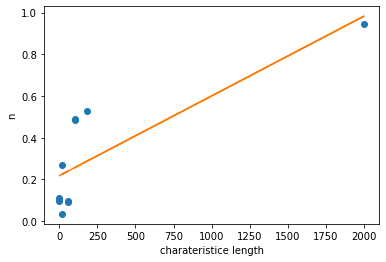

In [15]:
slope, intercept, r, p, stderr = scipy.stats.linregress(L_new, tau_new)
tau_L_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(L_new, tau_new, linewidth=0, marker='o')
ax.plot(L_new, intercept + slope * L_new, label=tau_L_line)
ax.set_xlabel('charateristice length')
ax.set_ylabel('n')
plt.show()